# PIA Aeroelasticidad


Consider the data provided for the following truck. Answer the provided questions. Validate and justify your reasonings and assumptions using sketches, drawings, equations, etc. In all the questions, provide a valid discussion of the results and comparison if applicable.

<img src="Camioneta.jpg" width="350" height="350">
<img src="Esf-def.jpg" width="550" height="550">
<img src="Tabla de datos.jpg">

1. Estimate the equivalent fundamental natural frequency for the vehicle without load and the vehicle fully loaded. Assume an initial (reasonable) deflection for the vehicle SDOF equivalent model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  #plotting module
%matplotlib inline
from math import sqrt,atan

#Parameters given
mass_tot = 1900              #kg
gross_mass = 2545            #kg
k_susp_front = 94000           #N/m
k_susp_rear = 29650            #N/m
k_tyre_front = 36300           #N/m
k_tyre_rear = 29530            #N/m
TR_front = 2                   #motion rate
TR_rear = 1.2                  #motion rate
mass_dist_front = 0.6          #mass distribution percentage
mass_dist_rear = 0.4          #mass distribution percentage

For the first part of obtaining the natural frequency of the system, the springs are arrange in a parallel way so, the total K would be:

$k_{tot} = 2k_1 + 2k_2$

Since the distribution of masses is almost very similar to the half-half distribution, this part will be omitted and taken as an equal distribution

And the masses to be used are the gross (fully loaded) and the total of the vehicle which is the one unloaded.

$\omega_{ntot} = \sqrt{\frac{2k_{front} + 2k_{rear}}{m_{tot}}}$ $\;\;\;\;\&\;\;\;\;\;\;$
$\omega_{nfull} = \sqrt{\frac{2k_{front} + 2k_{rear}}{m_{gross}}}$

In [2]:
#Calculating natural frequency loaded and unloaded
omega_ntot = sqrt((2*k_susp_front + 2*k_susp_rear)/mass_tot)
omega_nfull = sqrt((2*k_susp_front + 2*k_susp_rear)/gross_mass)

Now assuming initial conditions will permit graphically represent the response of the system.

In [3]:
# Set up simulation parameters
t = np.linspace(0, 10, 501)         

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0, 0.1])  #[m, m/s]

2. Estimate (plot) the free response for the cases studied in 1.

Remembering that for free response:

$x(t)=Asin(\omega_n t)+Bcos(\omega_n t)$

Most general solution, $A,$ $B$ constants depend upon Initial Conditions of the system. Evaluating the response and its derivative at $t=0$ gives the particular solution:

$x(t)=\frac{\dot{x_0}}{\omega_n}sin(\omega_n t)+x_0cos(\omega_n t)$

Which can also be expressed as:

$x(t)= Csin(\omega_n t + \phi)$

Considering that C gives the peak amplitude response and $\phi$ is the phase angle:

$C=\sqrt{A^2+B^2}$

$\phi=tan^{-1}\frac{B}{A}$

Results in:

$C=\sqrt{\left(\frac{\dot{x_0}}{\omega_n}\right)^2+x_0^2}=\frac{\sqrt{x_0^2\omega_n^2+\dot{x_o^2}}}{\omega_n}$

$\phi=tan^{-1}\frac{\omega_nx_0}{\dot{x_0}}$

In [4]:
# Calculate amplitude and exponential decay
# First for unloaded vehicle
C_tot = sqrt(x0[0]**2 + ((x0[1])/omega_ntot)**2)
phase_tot = atan(omega_ntot*x0[0]/x0[1]) 
x_t_tot = C_tot * np.sin(omega_ntot*t+phase_tot)

# then for fully load vehicle
C_full = sqrt(x0[0]**2 + ((x0[1])/omega_nfull)**2)
phase_full = atan(omega_nfull*x0[0]/x0[1]) 
x_t_full = C_full * np.sin(omega_nfull*t+phase_full)

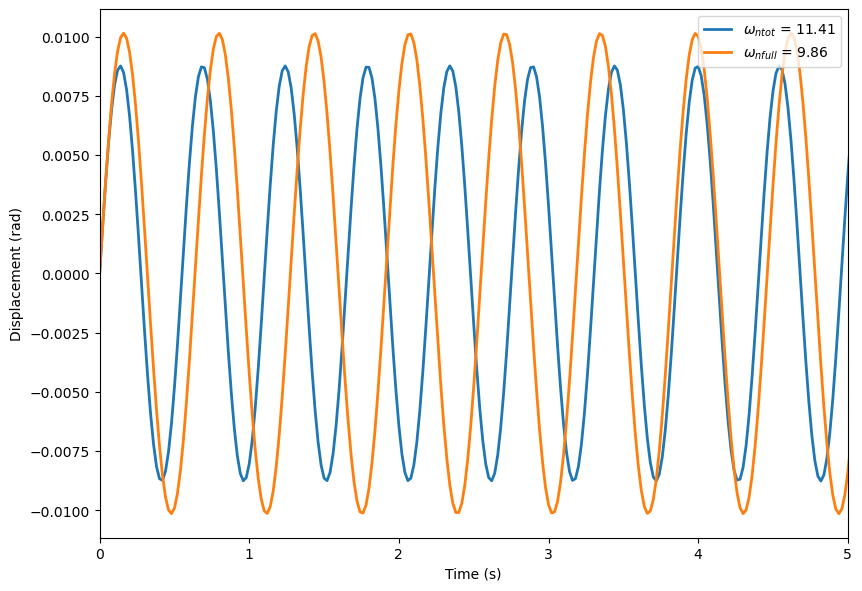

In [5]:
#Plot information
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_tot, linewidth = 2, label = '$\omega_{ntot}$ = %.2f' %(omega_ntot))
plt.plot(t, x_t_full, linewidth = 2, label = '$\omega_{nfull}$ = %.2f' %(omega_nfull))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.xlim(0,5)

# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook